<a href="https://colab.research.google.com/github/gokul3r/Clustering_Unsupervised/blob/main/Unsupervised_ML_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Data with Unsupervised ML

### UnSupervised Machine Learning
Unsupervised learning is a type of machine learning in which models are trained using unlabeled dataset and are allowed to act on that data without any supervision

### About KMeans Algorithm
K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. In this topic, we will learn what is K-means clustering algorithm, how the algorithm works, along with the Python implementation of k-means clustering.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("ufo_fullset.csv")
df.head()


,reportedTimestamp,eventDate,eventTime,shape,duration,witnesses,weather,firstName,lastName,latitude,longitude,sighting,physicalEvidence,contact,researchOutcome
0,1977-04-04T04:02:23.340Z,1977-03-31,23:46,circle,4,1,rain,Ila,Bashirian,47.329444,-122.578889,Y,N,N,explained
1,1982-11-22T02:06:32.019Z,1982-11-15,22:04,disk,4,1,partly cloudy,Eriberto,Runolfsson,52.664913,-1.034894,Y,Y,N,explained
2,1992-12-07T19:06:52.482Z,1992-12-07,19:01,circle,49,1,clear,Miller,Watsica,38.951667,-92.333889,Y,N,N,explained
3,2011-02-24T21:06:34.898Z,2011-02-21,20:56,disk,13,1,partly cloudy,Clifton,Bechtelar,41.496944,-71.367778,Y,N,N,explained
4,1991-03-09T16:18:45.501Z,1991-03-09,11:42,circle,17,1,mostly cloudy,Jayda,Ebert,47.606389,-122.330833,Y,N,N,explained


In [ ]:
df.info()
#Steps
#Remove Firstname, Last name, reported time stamp, contact, physical evidence, weather

df=df.drop(columns=['reportedTimestamp','firstName','lastName','physicalEvidence','contact','weather'])
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reportedTimestamp  18000 non-null  object 
 1   eventDate          18000 non-null  object 
 2   eventTime          18000 non-null  object 
 3   shape              17998 non-null  object 
 4   duration           18000 non-null  int64  
 5   witnesses          18000 non-null  int64  
 6   weather            18000 non-null  object 
 7   firstName          18000 non-null  object 
 8   lastName           18000 non-null  object 
 9   latitude           18000 non-null  float64
 10  longitude          18000 non-null  float64
 11  sighting           18000 non-null  object 
 12  physicalEvidence   18000 non-null  object 
 13  contact            18000 non-null  object 
 14  researchOutcome    18000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 2.1+ MB


,eventDate,eventTime,shape,duration,witnesses,latitude,longitude,sighting,researchOutcome
0,1977-03-31,23:46,circle,4,1,47.329444,-122.578889,Y,explained
1,1982-11-15,22:04,disk,4,1,52.664913,-1.034894,Y,explained
2,1992-12-07,19:01,circle,49,1,38.951667,-92.333889,Y,explained
3,2011-02-21,20:56,disk,13,1,41.496944,-71.367778,Y,explained
4,1991-03-09,11:42,circle,17,1,47.606389,-122.330833,Y,explained


In [ ]:
#filter research outcome=explained, g
print(set(df["researchOutcome"]))
df_grp_rearch_tcome=df.groupby(by="researchOutcome",as_index=False).count()
df=df[df['researchOutcome']=="explained"]
set(df["researchOutcome"])

{'explained', 'probable', 'unexplained'}


{'explained'}

In [ ]:
df.head()

,eventDate,eventTime,shape,duration,witnesses,latitude,longitude,sighting,researchOutcome
0,1977-03-31,23:46,circle,4,1,47.329444,-122.578889,Y,explained
1,1982-11-15,22:04,disk,4,1,52.664913,-1.034894,Y,explained
2,1992-12-07,19:01,circle,49,1,38.951667,-92.333889,Y,explained
3,2011-02-21,20:56,disk,13,1,41.496944,-71.367778,Y,explained
4,1991-03-09,11:42,circle,17,1,47.606389,-122.330833,Y,explained


In [ ]:
df=df.drop(columns=["shape"],axis=1)
df.head()


,eventDate,eventTime,duration,witnesses,latitude,longitude,sighting,researchOutcome
0,1977-03-31,23:46,4,1,47.329444,-122.578889,Y,explained
1,1982-11-15,22:04,4,1,52.664913,-1.034894,Y,explained
2,1992-12-07,19:01,49,1,38.951667,-92.333889,Y,explained
3,2011-02-21,20:56,13,1,41.496944,-71.367778,Y,explained
4,1991-03-09,11:42,17,1,47.606389,-122.330833,Y,explained


In [ ]:
df=df.drop(columns=["witnesses"],axis=1)
df.head()

,eventDate,eventTime,duration,latitude,longitude,sighting,researchOutcome
0,1977-03-31,23:46,4,47.329444,-122.578889,Y,explained
1,1982-11-15,22:04,4,52.664913,-1.034894,Y,explained
2,1992-12-07,19:01,49,38.951667,-92.333889,Y,explained
3,2011-02-21,20:56,13,41.496944,-71.367778,Y,explained
4,1991-03-09,11:42,17,47.606389,-122.330833,Y,explained


In [ ]:
df=df.drop(columns=["sighting"],axis=1)
df.head()

,eventDate,eventTime,duration,latitude,longitude,researchOutcome
0,1977-03-31,23:46,4,47.329444,-122.578889,explained
1,1982-11-15,22:04,4,52.664913,-1.034894,explained
2,1992-12-07,19:01,49,38.951667,-92.333889,explained
3,2011-02-21,20:56,13,41.496944,-71.367778,explained
4,1991-03-09,11:42,17,47.606389,-122.330833,explained


In [ ]:
df=df.drop(columns=["researchOutcome"],axis=1)
df.head()

,eventDate,eventTime,duration,latitude,longitude
0,1977-03-31,23:46,4,47.329444,-122.578889
1,1982-11-15,22:04,4,52.664913,-1.034894
2,1992-12-07,19:01,49,38.951667,-92.333889
3,2011-02-21,20:56,13,41.496944,-71.367778
4,1991-03-09,11:42,17,47.606389,-122.330833


In [ ]:
str1="1977-03-31"
event_year=str1[:4]
event_month=str1[5:7]
event_month

df["eventYear"]=df["eventDate"].apply(lambda x: x[:4])
df["eventMonth"]=df["eventDate"].apply(lambda x: x[5:7])
df=df.drop(columns=['eventDate'])
df.head()

,eventTime,duration,latitude,longitude,eventYear,eventMonth
0,23:46,4,47.329444,-122.578889,1977,03
1,22:04,4,52.664913,-1.034894,1982,11
2,19:01,49,38.951667,-92.333889,1992,12
3,20:56,13,41.496944,-71.367778,2011,02
4,11:42,17,47.606389,-122.330833,1991,03


In [ ]:
df["eventHour"]=df["eventTime"].apply(lambda x: x[:2])
df=df.drop(columns=['eventTime'])
df.head()

,duration,latitude,longitude,eventYear,eventMonth,eventHour
0,4,47.329444,-122.578889,1977,03,23
1,4,52.664913,-1.034894,1982,11,22
2,49,38.951667,-92.333889,1992,12,19
3,13,41.496944,-71.367778,2011,02,20
4,17,47.606389,-122.330833,1991,03,11


In [ ]:
df_grp_month=df.groupby(by="eventMonth",as_index=False).count()
df_grp_month

,eventMonth,duration,latitude,longitude,eventYear,eventHour
0,01,1088,1088,1088,1088,1088
1,02,987,987,987,987,987
2,03,1063,1063,1063,1063,1063
3,04,1049,1049,1049,1049,1049
4,05,1139,1139,1139,1139,1139
5,06,1049,1049,1049,1049,1049
6,07,1072,1072,1072,1072,1072
7,08,1101,1101,1101,1101,1101
8,09,1091,1091,1091,1091,1091
9,10,1067,1067,1067,1067,1067


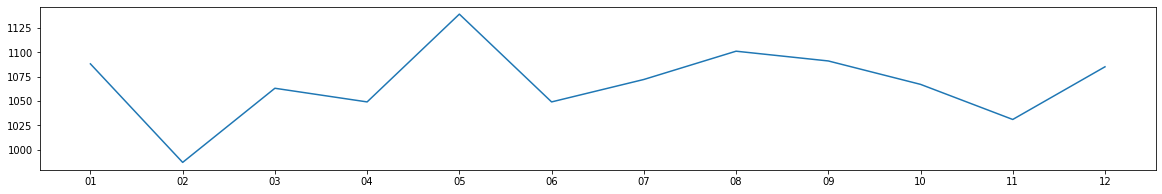

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_grp_month["eventMonth"],df_grp_month["duration"])
plt.show()

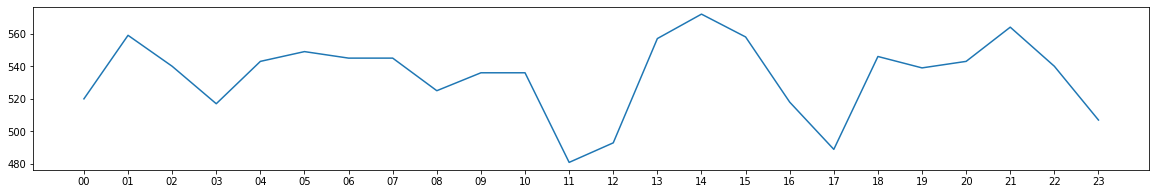

In [ ]:
df_grp_hour=df.groupby(by="eventHour",as_index=False).count()
plt.plot(df_grp_hour["eventHour"],df_grp_hour["duration"])
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
df.head()


,duration,latitude,longitude,eventYear,eventMonth,eventHour
0,4,47.329444,-122.578889,1977,03,23
1,4,52.664913,-1.034894,1982,11,22
2,49,38.951667,-92.333889,1992,12,19
3,13,41.496944,-71.367778,2011,02,20
4,17,47.606389,-122.330833,1991,03,11


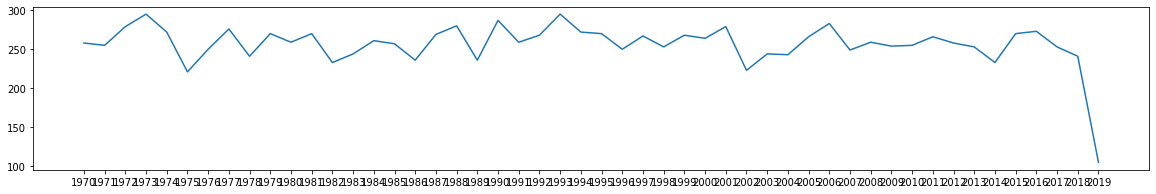

In [ ]:
df_grp_year=df.groupby(by="eventYear",as_index=False).count()
plt.plot(df_grp_year["eventYear"],df_grp_year["duration"])
plt.show()

   duration  latitude  longitude  eventYear  eventMonth  eventHour
0         1       137        137        137         137        137
1         2       125        125        125         125        125
2         3       129        129        129         129        129
3         4       149        149        149         149        149
4         5       125        125        125         125        125


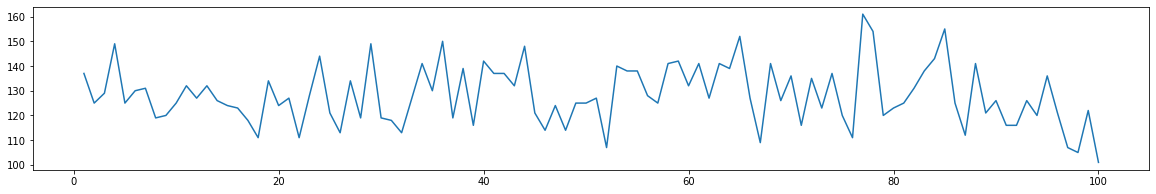

In [ ]:
df_grp_duration=df.groupby(by="duration",as_index=False).count()
print(df_grp_duration.head())
plt.plot(df_grp_duration["duration"],df_grp_duration["eventMonth"])
plt.show()

In [ ]:
df.head()

,duration,latitude,longitude,eventYear,eventMonth,eventHour
0,4,47.329444,-122.578889,1977,03,23
1,4,52.664913,-1.034894,1982,11,22
2,49,38.951667,-92.333889,1992,12,19
3,13,41.496944,-71.367778,2011,02,20
4,17,47.606389,-122.330833,1991,03,11


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

df_ss_array=ss.fit_transform(df)

df_ss=pd.DataFrame(df_ss_array,index=df.index,columns=df.columns)
df_ss.head()

,duration,latitude,longitude,eventYear,eventMonth,eventHour
0,-1.621281,0.956467,-0.921415,-1.202151,-1.023560,1.660639
1,-1.621281,1.489850,2.223684,-0.850880,1.302788,1.516368
2,-0.047998,0.118945,-0.138788,-0.148338,1.593581,1.083557
3,-1.306624,0.373395,0.403735,1.186492,-1.314354,1.227828
4,-1.166777,0.984152,-0.914996,-0.218592,-1.023560,-0.070605


In [ ]:
#Implementing KMEANS

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10,init='k-means++')
kmeans.fit(df_ss)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.inertia_

30987.541028861913

**Getting Optimal K-Value**

To find the optimal value of clusters, the elbow method follows the below steps:

It executes the K-means clustering on a given dataset for different K values (ranges from 1-40 here).
For each value of K, calculates the WCSS value.
Plots a curve between calculated WCSS values and the number of clusters K.
The sharp point of bend or a point of the plot looks like an arm, then that point is considered as the best value of K.

Text(0, 0.5, 'Inertia')

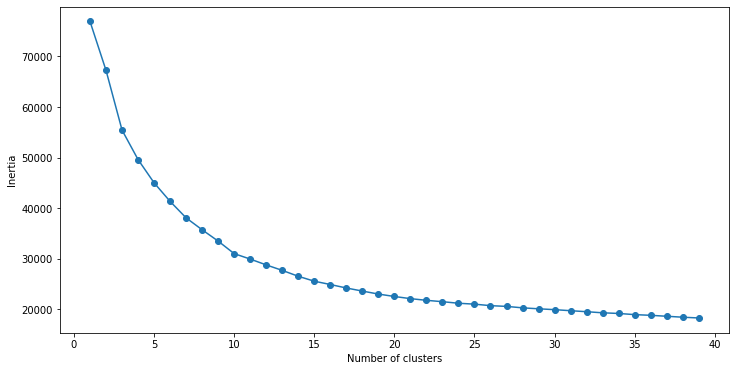

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,40):
  kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
  kmeans.fit(df_ss)
  SSE.append(kmeans.inertia_)


# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,40), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# k means using 10 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 10, init='k-means++')
kmeans.fit(df_ss)
pred = kmeans.predict(df_ss)

In [ ]:

df_ss['cluster'] = pred
df_ss['cluster'].value_counts()

3    1588
1    1545
6    1518
8    1501
9    1493
0    1489
4    1482
5    1441
7     567
2     198
Name: cluster, dtype: int64

# KMeans for Customer Purchase

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("FyntraCustomerData.csv")
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df = df.drop(columns=["Address", "Avatar"], axis=1)
df.head()

,Email,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

df1 = df.drop("Email", axis = 1)
df_ss_array=ss.fit_transform(df1)

df_ss=pd.DataFrame(df_ss_array,index=df1.index,columns=df1.columns)
df_ss.head()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,1.456351,0.607280,2.493589,0.550107,1.118654
1,-1.136502,-0.949464,0.206556,-0.870927,-1.351783
2,-0.052723,-0.727139,0.049681,0.572067,-0.148501
3,1.263010,1.676390,-0.335978,-0.413996,1.041684
4,0.279838,0.747770,0.471737,0.914422,1.263224


In [ ]:
# k means using 10 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(df_ss)
pred = kmeans.predict(df_ss)

In [ ]:
df_ss['cluster'] = pred
df_ss['cluster'].value_counts()

0    184
1    169
2    147
Name: cluster, dtype: int64

In [ ]:
cols = ['AUTHOR_NAME', 'title']
df.join(df2.set_index(cols), on=cols)

In [ ]:
df_ss["Email"] = df["Email"]
df_ss.head()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent,cluster,Email
0,1.456351,0.607280,2.493589,0.550107,1.118654,2,mstephenson@fernandez.com
1,-1.136502,-0.949464,0.206556,-0.870927,-1.351783,0,hduke@hotmail.com
2,-0.052723,-0.727139,0.049681,0.572067,-0.148501,1,pallen@yahoo.com
3,1.263010,1.676390,-0.335978,-0.413996,1.041684,2,riverarebecca@gmail.com
4,0.279838,0.747770,0.471737,0.914422,1.263224,2,mstephens@davidson-herman.com


In [ ]:
df_ss[df_ss["Email"]=="aaron04@yahoo.com"]

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent,cluster,Email
370,0.657462,-1.902204,0.695999,1.247661,0.276729,1,aaron04@yahoo.com


In [ ]:
df_ss.to_csv("Fyntra_clustered.csv")